# Detecting Parkinson’s Disease

## Goal for this Notebook:

The aim of this notebook is to predict Parkinson’s Disease to patients using machine learning models.

### What is Parkinson’s Disease?
Parkinson’s disease is a progressive disorder of the central nervous system affecting movement and inducing tremors and stiffness. It has 5 stages to it and affects more than 1 million individuals every year in India. This is chronic and has no cure yet. It is a neurodegenerative disorder affecting dopamine-producing neurons in the brain.


# This Notebook will show basic examples of:

# Data Handling
 - Importing Data with Pandas
 - Cleaning Data
 - Exploring Data through Visualizations with Matplotlib

# Data Analysis
 - Automated fast track EDA/ visualisation
 - Pipelined data preperation
 - Automated Machine Learning and Neural Network analysis


In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

from EDA_ML_Package.EDA_functions import Data_Analysis
from EDA_ML_Package.ML_functions import ML_models
from EDA_ML_Package.NN_functions import ANN_tabular_class

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 15)

C:\Users\user\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\user\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\user\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
df = pd.read_csv("Parkinsson disease.csv")

ML = ML_models()
DA = Data_Analysis()
ΝΝ = ANN_tabular_class()


--------------------------------------------------------------


In [4]:
def descriptive_analysis(data, target_attribute='none'):
    """ A table is created with the characteristics of a dataframe
    The table is printed in the pdf report

    Parameters
    ----------
    df: (dataframe)
    target_attribute: (str) optional

    Output: table
    """
    
    # 1. Print describe()
    print(data.describe())
    
    df = round(data.copy(deep=True), 2)

    # 2. Print df size
    print('\nnumber of attributes: ', len(df.columns), '/ number of instances: ', len(df), '\n')

    # tc: table characteristics
    tc = pd.DataFrame(df.isnull().sum(), columns=['NaN'])
    tc['NaN %'] = round(tc['NaN']/len(df)*100, 1)
    tc['memory'] = df.memory_usage(deep=True)
    tc['Unique'] = [len(df[i].unique()) for i in list(df.columns)]
    tc['type'] = df.dtypes

    indexValue = 3
    tc['values'] = [df[clm].unique().tolist()[:indexValue] for clm in list(df.columns)]

    # for i, vl_list in enumerate(df.values):
    #    sm['values'].iloc[i] = [round(vl, 3) for vl in vl_list]

    for x, vl in enumerate(tc['values']):
        if tc['Unique'].iloc[x] > 3:
            vl.append('...')
        for i, y in enumerate(vl):
            if len(str(y)) > 10:
                try:
                    vl[i] = y[:10] + '..'
                except Exception:
                    pass
    tc = tc.reset_index()
    tc = tc.astype(str)

    # 3. print table characteristics
    print(tc)

    if target_attribute != 'none':
        attribute_range(df, target_attribute)

def attribute_range(data, target_attribute):
    """ A table is created with the range of values of an attribute
    The table is printed in the pdf report

    Parameters
    ----------
    df: (dataframe)
    target_attribute: (str)

    Output: -
    """
    df = data.copy(deep=True)
    dx = DA.groupby_count_percentage(df, [target_attribute])
    print('\nValue Distribution of the Target attribute\n')
    print(dx)
    return dx



## Exploratory Data Analysis

The next function generates histogram and box plots for all the numerical attributes of the dataset.
If the target attribute is given, the class distribution is depicted for each attribute.

In [12]:
def box_hist_EDA_plots(df, plot_type='boxplot', target_att='', density_v=False, no_rows=-1):
    """Function that generates histogram/ box plots for the numerical attributes
    and count for the object attributes"""
    def plot_hist():
        hist_list = []
        labels_list = []
        values_list = df_copy[target_att].unique().tolist()
        values_list.sort()
        for i, val in enumerate(values_list):
            hist_list.append(df_copy.loc[df_copy[target_att] == val, col].values)
            labels_list.append(str(val))

        plt.hist(hist_list, **kwargs, label=labels_list, color=colors[0:len(hist_list)])
        plt.xticks(fontsize=12)
        plt.legend()
        
        return plt.gca().get_ylim()

    df_copy = df.copy()

    # find optimum number of rows if not given
    if no_rows == -1:
        no_rows = divmod(len(df_copy.columns), 10)[0]

    # figure quality
    fig = plt.figure(figsize=(25, 5*no_rows))

    kwargs = dict(alpha=0.5, bins=20, density=density_v)  # , stacked=False)
    colors = ['b', 'r', 'g']

    # loop through all attributes
    for i, col in enumerate(df_copy.columns, 1):

        # numerical attributes
        if (df_copy[col].dtype == np.float64 or df_copy[col].dtype == np.int64):
            plt.subplot(no_rows, math.ceil(len(df_copy.columns)/no_rows), i)

            # box plot
            if plot_type == 'boxplot':
                plt.boxplot(df_copy[~df_copy[col].isnull()][col])
                ax = plt.gca()
                ax.axes.xaxis.set_ticklabels([])

            else:  # histogram
                if target_att != '':
                    plot_hist()
                else:
                    plt.hist(df_copy[~df_copy[col].isnull()][col])

            plt.title(col, fontsize=20)

        else:  # object attributes
            plt.subplot(no_rows, math.ceil(len(df_copy.columns)/no_rows), i)

            if len(df_copy[col].unique()) <= 15:
                if target_att != '':  # class histogram
                    df_copy[col], map_dict = DA.categorise_codes(df_copy, col)
                    y_max = plot_hist()
                    str_mad_dict = str(map_dict).replace(",", "\n")
                    plt.text(0.35, y_max[1]*0.1, str_mad_dict, size=15)
                else:  # count plot
                    sp = sns.countplot(x=col, data=df_copy)
                    plt.setp(sp.get_xticklabels(), ha="right", rotation=25, fontsize=10)
                    sp.set(xlabel=None)

            else:  # empty plot
                plt.text(0.35, 0.35, str(len(df_copy[col].unique())) + " unique values", size=15)
                ax = plt.gca()
                ax.axes.xaxis.set_ticklabels([])
            plt.title(col, fontsize=20)

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
    plt.show()
    # return fig

def heatmap_corr_plot(data, listColmRemove=[]):

    data_columns = data.columns.tolist()

    if listColmRemove != []:
        for colm in listColmRemove:
            data_columns.remove(colm)

    data = data[data_columns]

    mask = np.triu(data.corr())
    plt.figure(figsize=(15, 6))
    sns.heatmap(round(data.corr(), 2), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
    # plt.ylim(18, 0)
    plt.title('Correlation Matrix Heatmap')
    # plt.show()


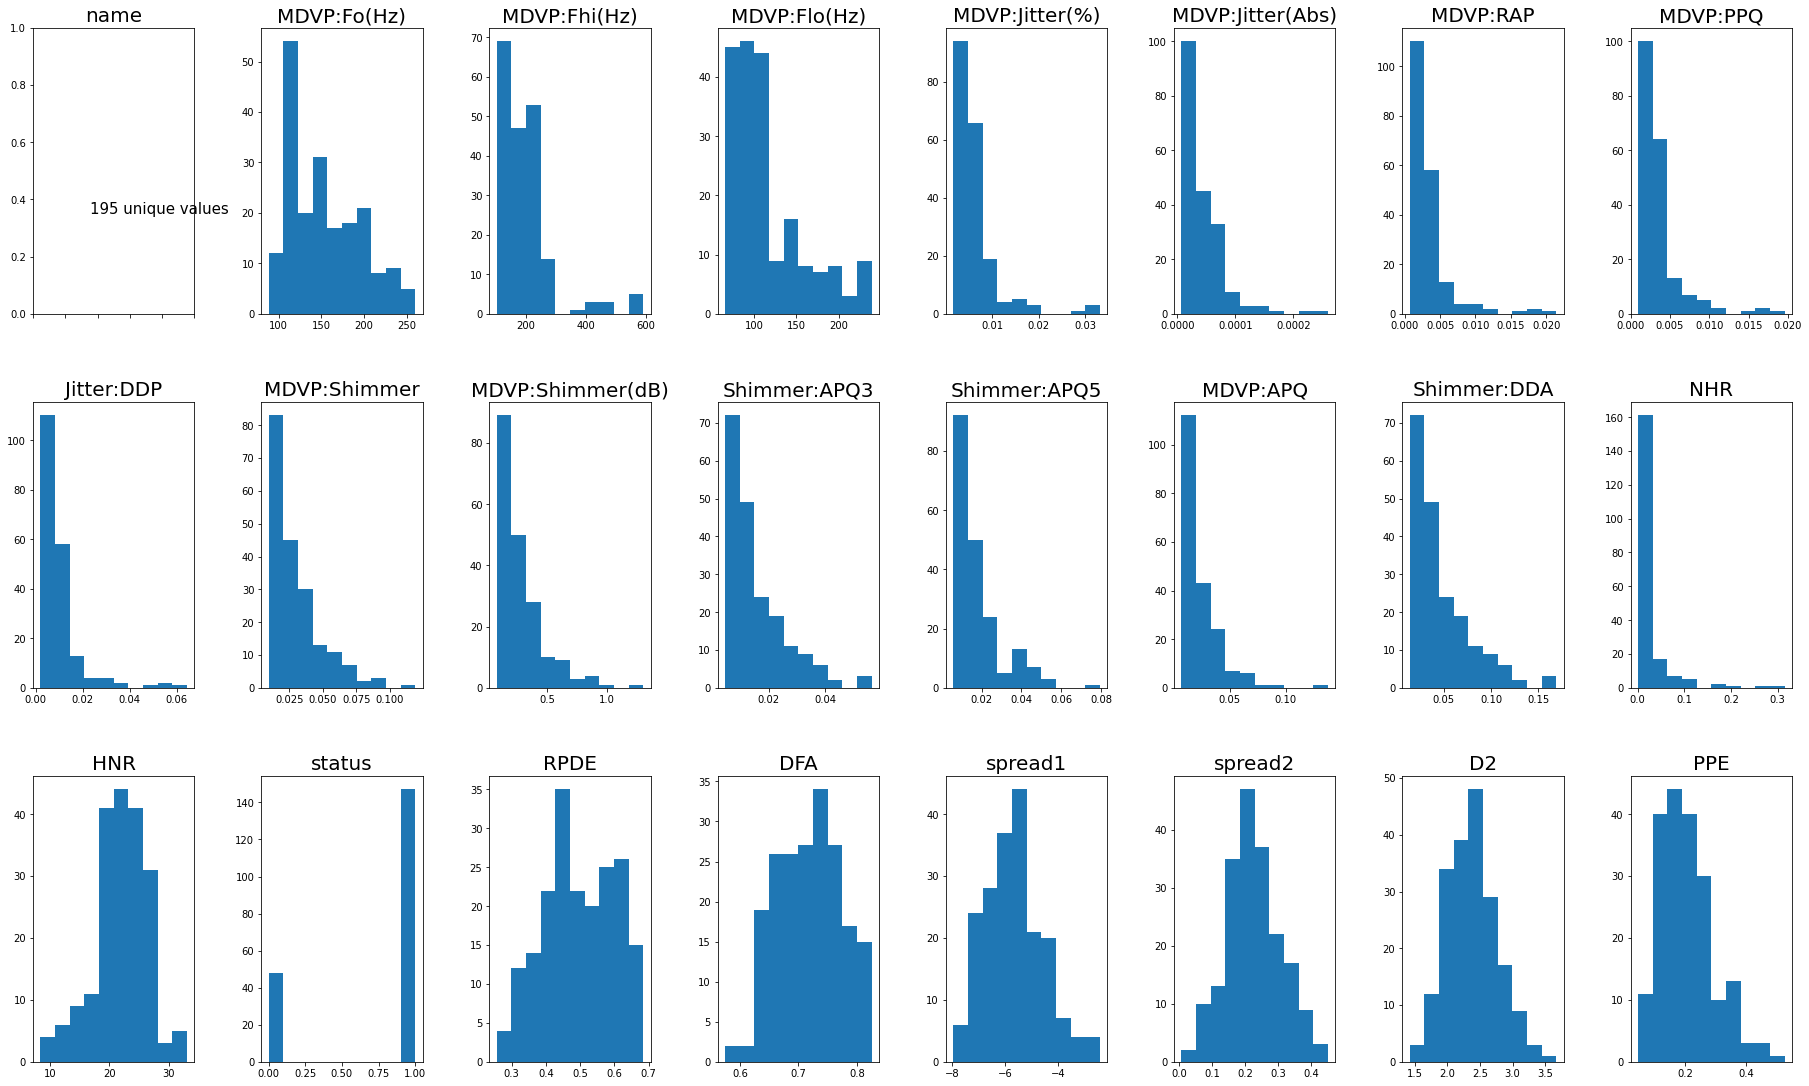

In [10]:
box_hist_EDA_plots(df, 'hist', no_rows=3)

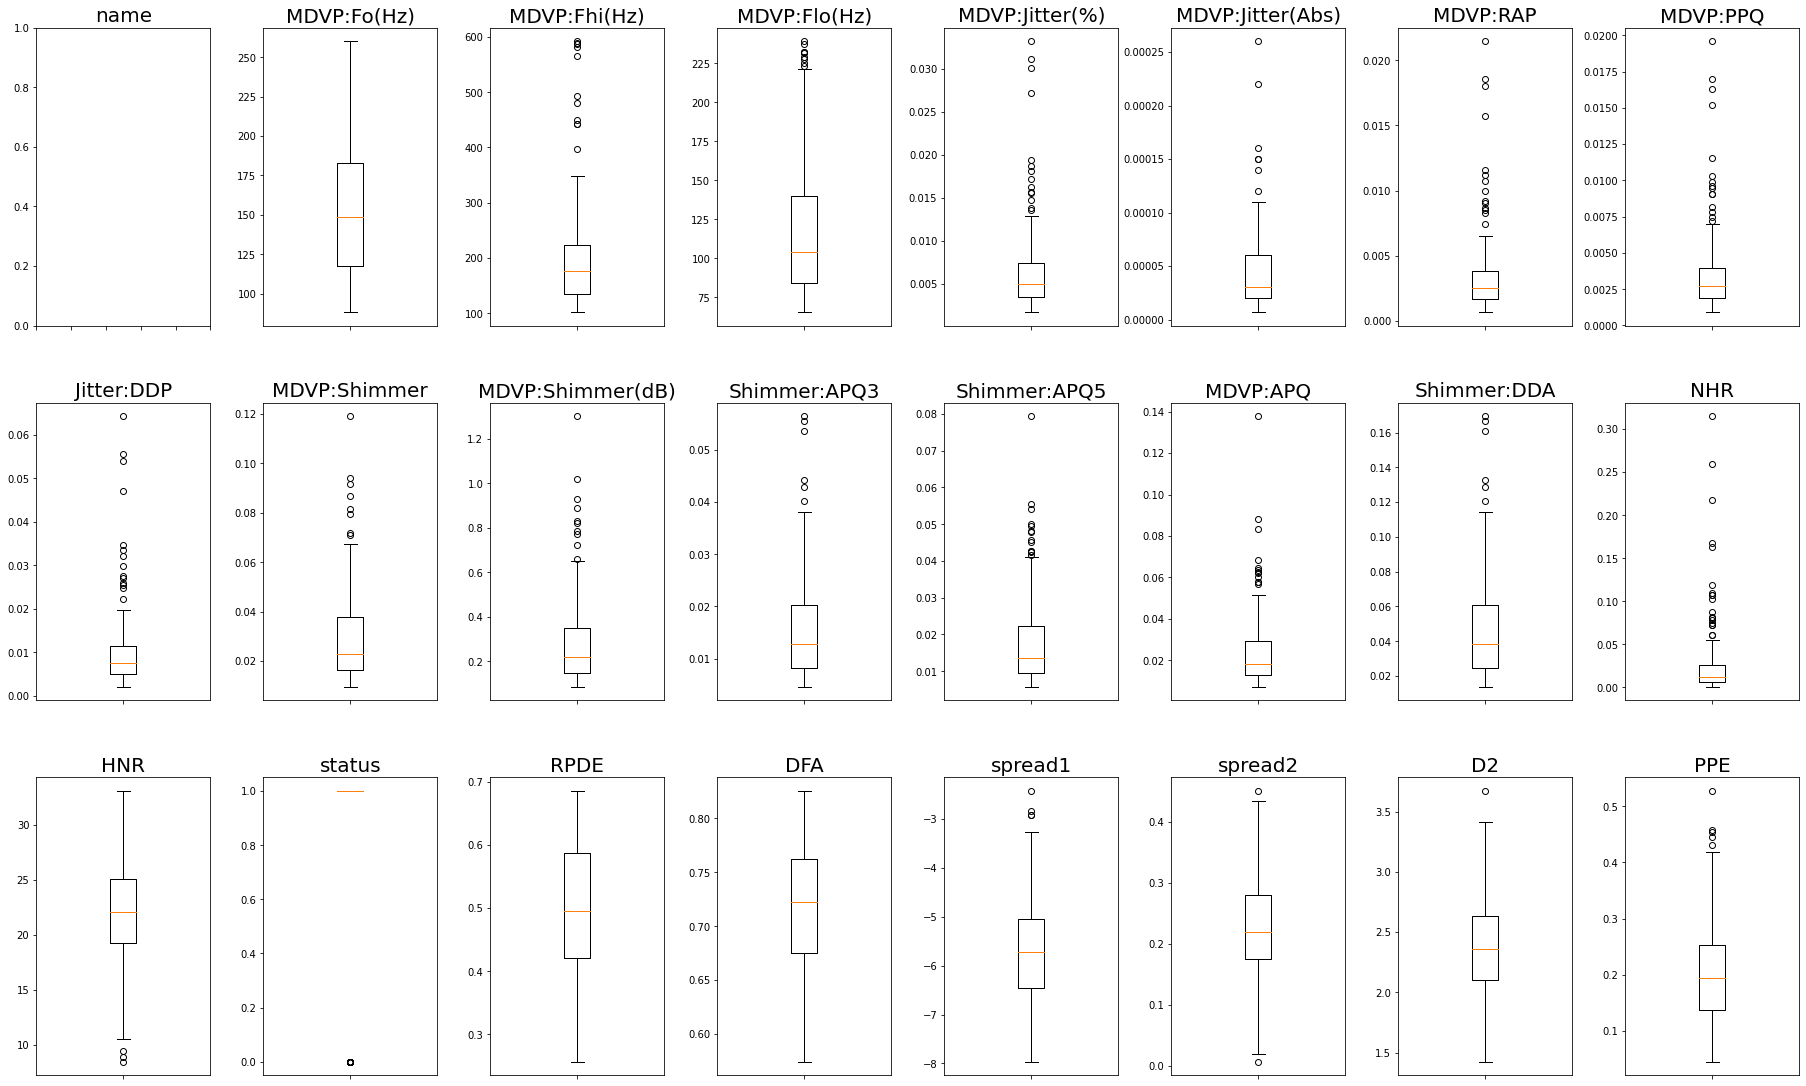

In [14]:
box_hist_EDA_plots(df, no_rows=3)

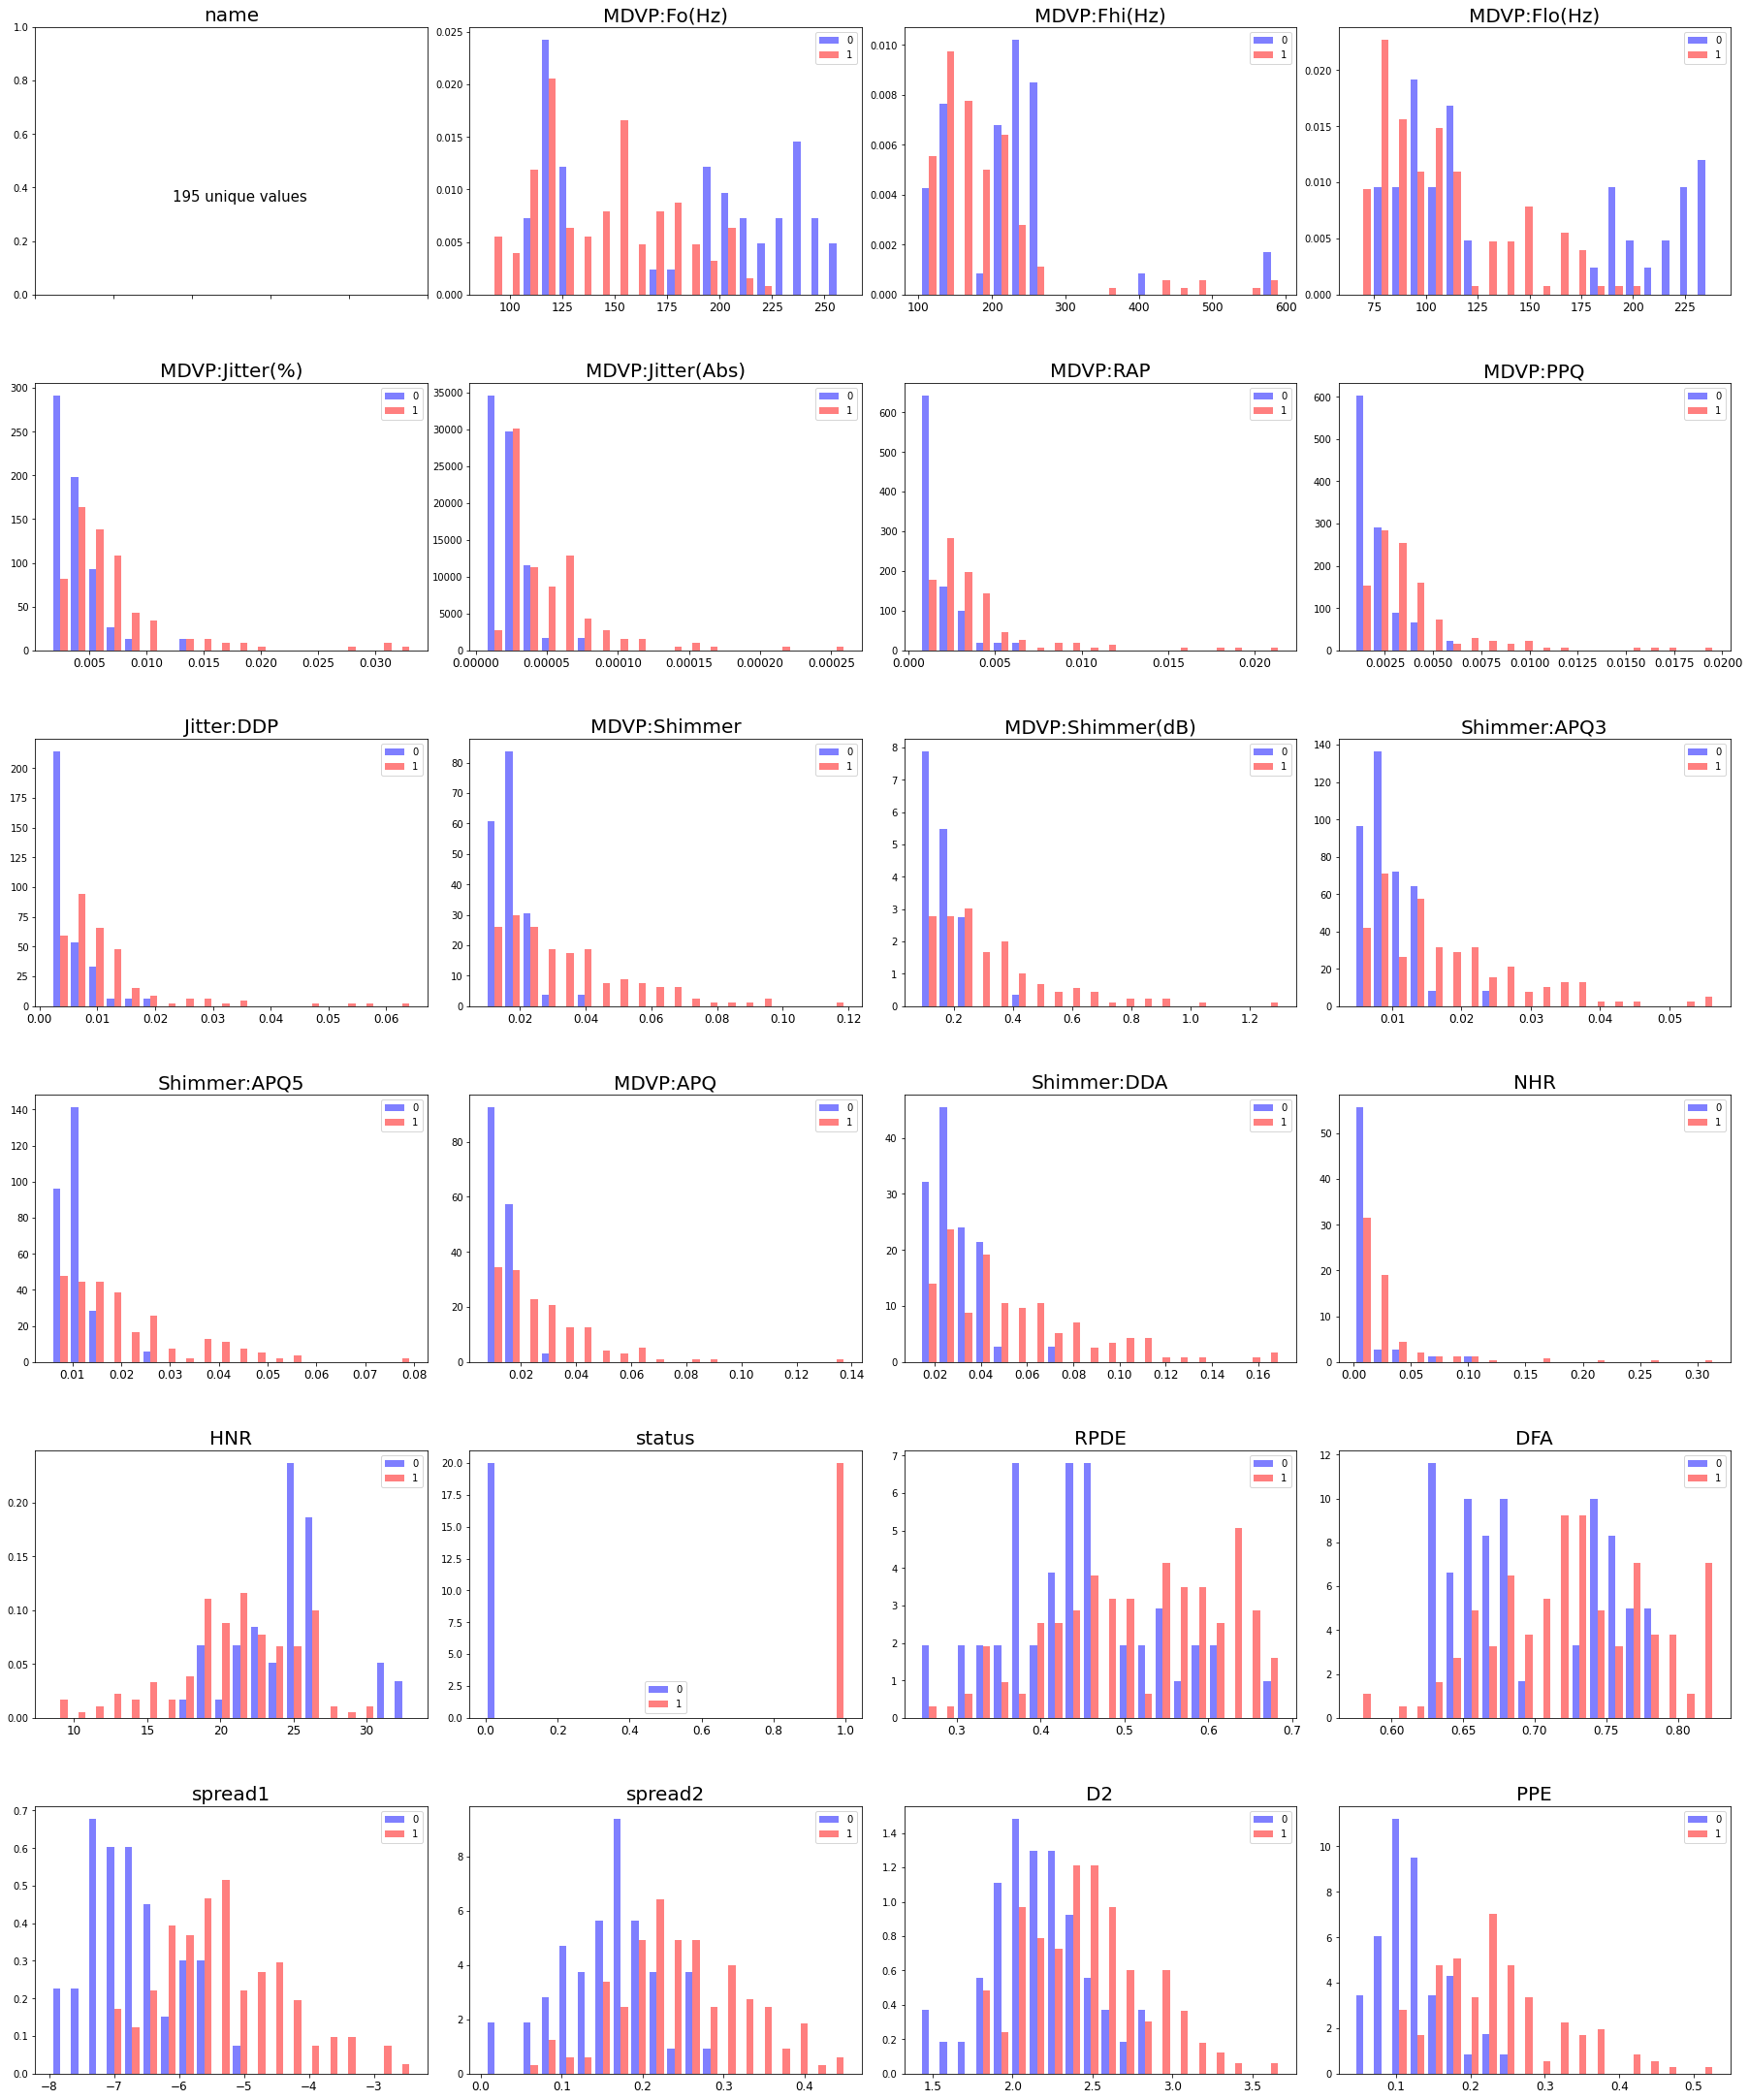

In [13]:
# Density histograms for each attribute
box_hist_EDA_plots(df, plot_type='hist', target_att='status', no_rows=6, density_v=True)


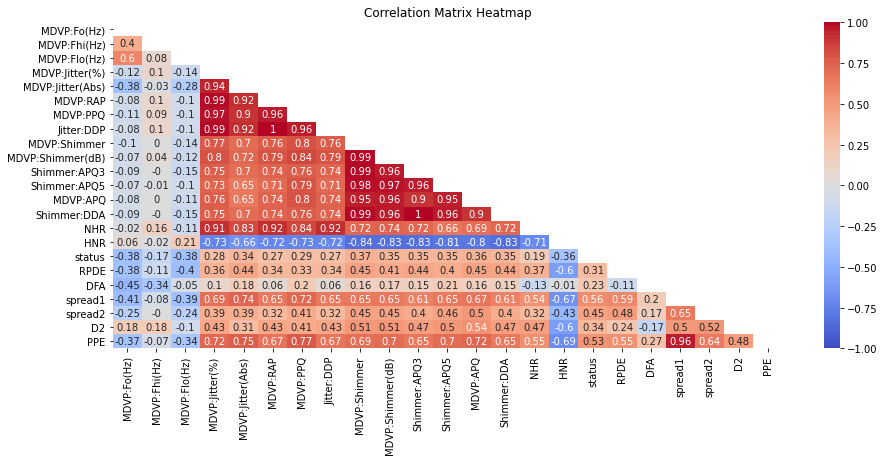

In [18]:
heatmap_corr_plot(df)

Even a non-expert can understand that the values in some attributes affect the Parkinsson status. For example high values in the "Shimmer" attributes would result almsot certainly the positive detection of the Parkinsson Disease. 

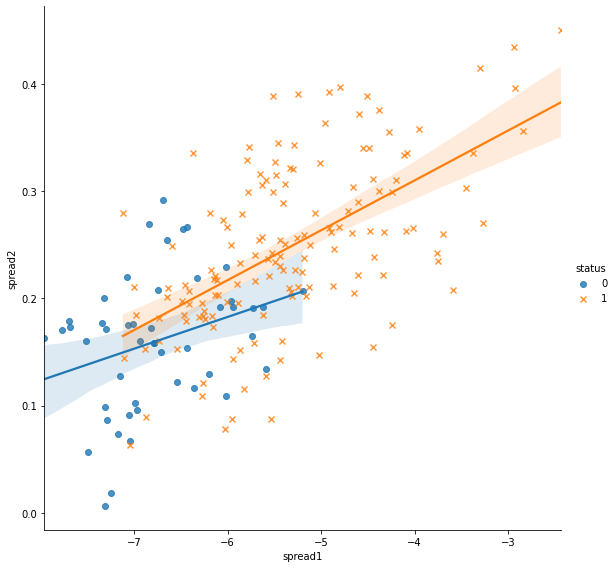

In [15]:
sns.pairplot(df, x_vars=["spread1"], y_vars=["spread2"],
             hue="status", markers=["o", "x"], height=8, kind="reg")


## Feature Analysis

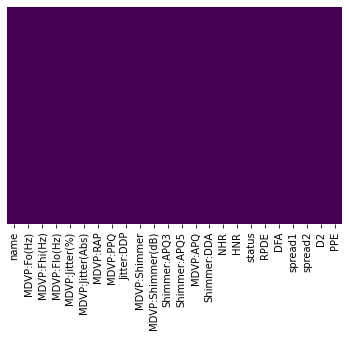

       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  ...      status        RPDE  \
count        195.000000  195.000000  195.000000  ...  195.000000  195.000000   
mean           0.000044    0.003306    0.003446  ...    0.753846    0.498536   
std            0.000035    0.002968    0.002759  ...    0.431878    0.103942   
min            0.000007    0.000680    0.000920  ...    0.000000    0.256570   
25%  

In [16]:
nht = sns.heatmap(df.isnull(), cmap="viridis", yticklabels=False, cbar=False, )
plt.show()

descriptive_analysis(df, 'status')

The data were already in adequate form so no further feature engineering is required

## ML Analysis

The next step of this notebook is to found the ML algorithm that returns the best f1 value.

The f1 measure is selected due to the fact that the datset is quite imbalanced (25%-75%)

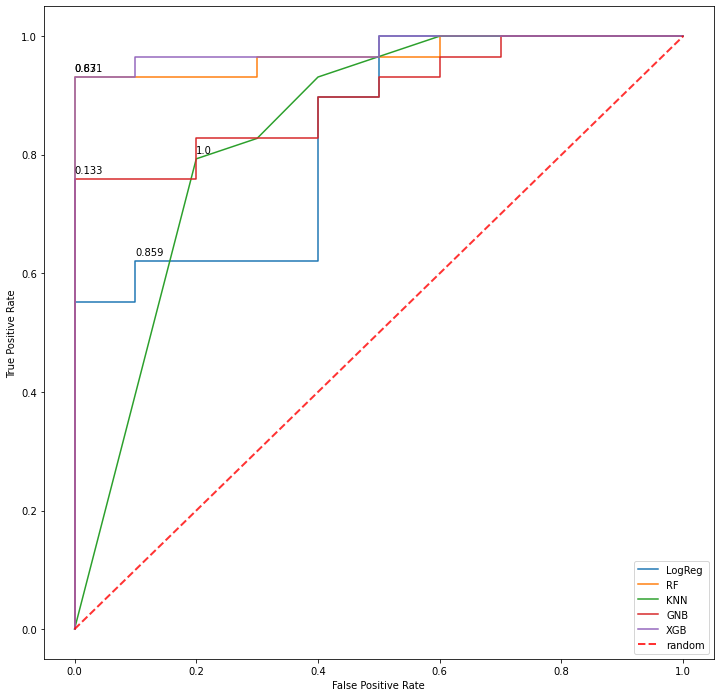

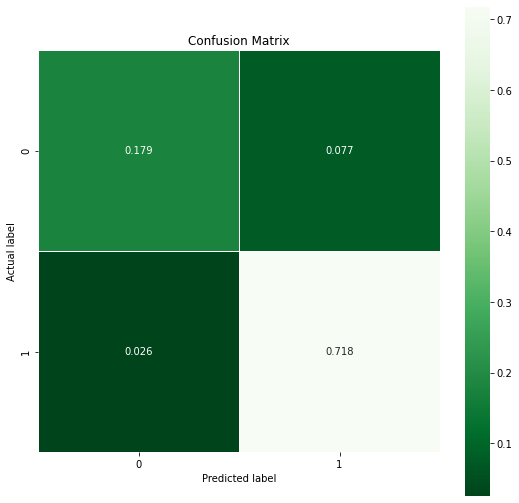

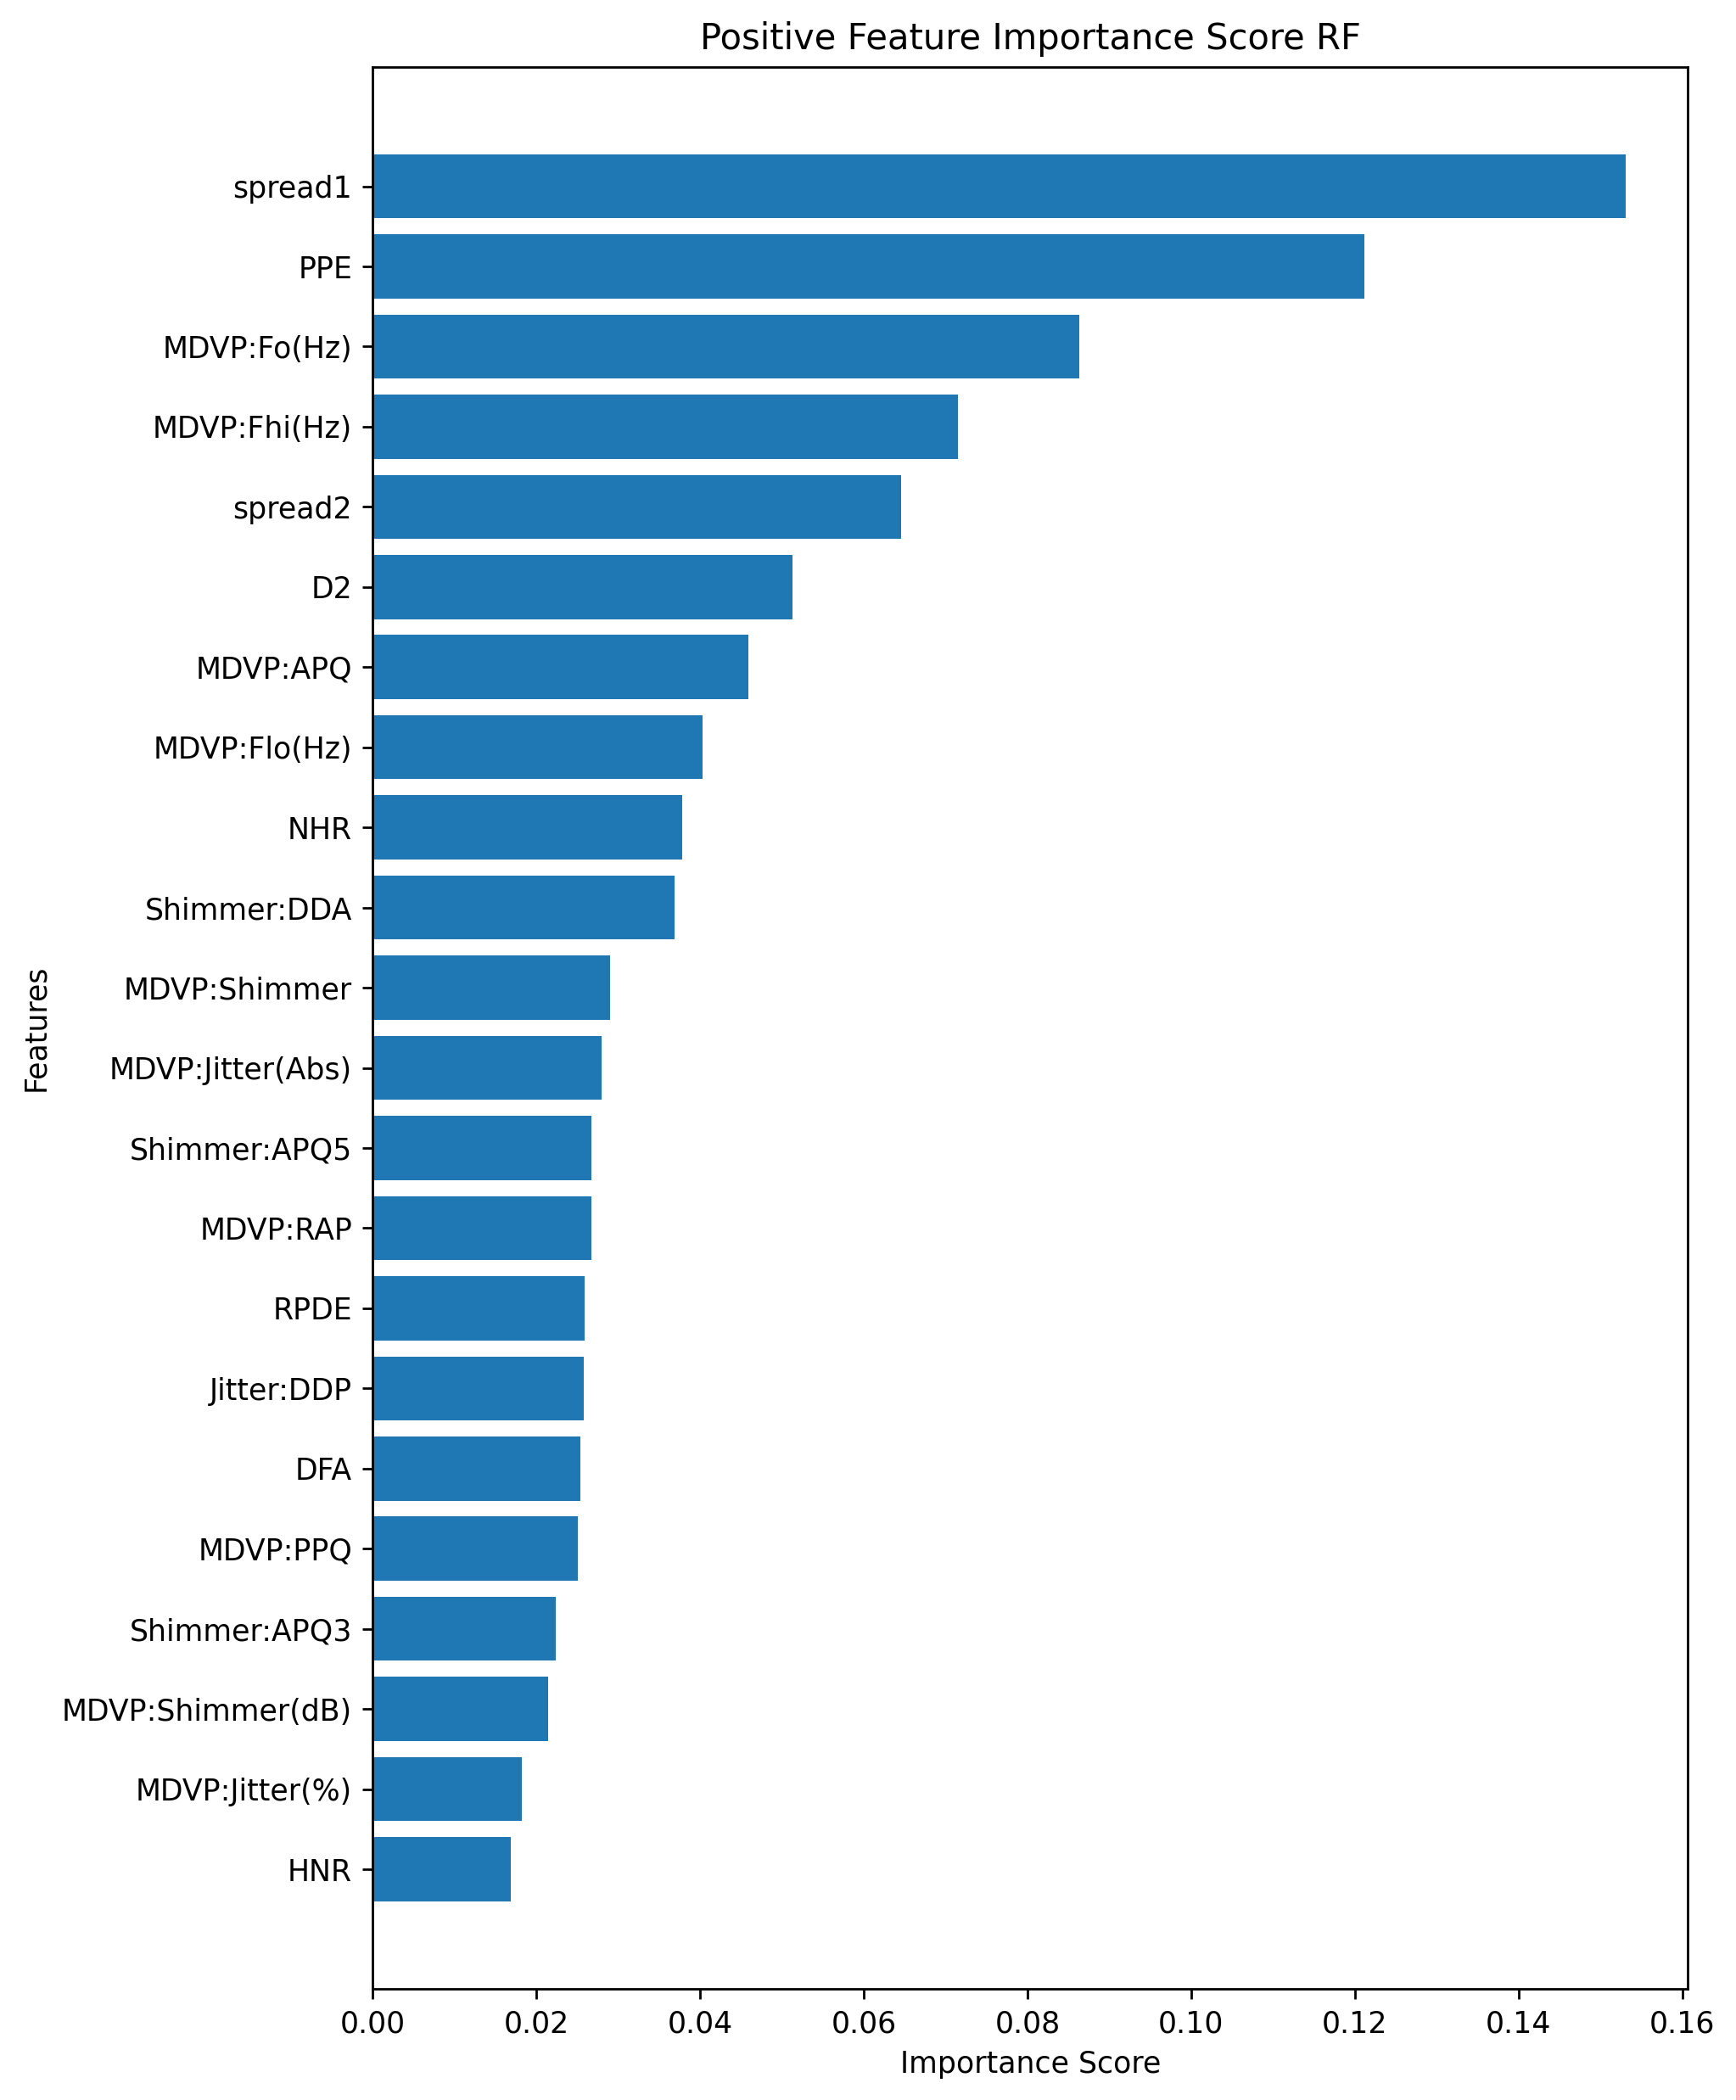


 ================ ML Analysis Completed ================
    model    acc  precision  recall     f1 dtype  fit_tm  score_tm
1      RF  0.897      0.903   0.966  0.933  test     NaN       NaN
4     XGB  0.872      0.875   0.966  0.918  test     NaN       NaN
2     KNN  0.846      0.871   0.931  0.900  test     NaN       NaN
0  LogReg  0.821      0.867   0.897  0.881  test     NaN       NaN
3     GNB  0.795      1.000   0.724  0.840  test     NaN       NaN
9     XGB  0.942      0.935   0.992  0.961    cv   0.033     0.003
6      RF  0.916      0.920   0.976  0.945    cv   0.122     0.010
5  LogReg  0.878      0.885   0.966  0.921    cv   0.020     0.004
7     KNN  0.839      0.862   0.953  0.899    cv   0.002     0.004
8     GNB  0.693      0.964   0.626  0.752    cv   0.002     0.004


<Figure size 432x288 with 0 Axes>

In [35]:
X = df.drop('name', axis = 1)
X = X.drop('status', axis = 1)
y = df['status']

results = ML.ML_Basic_Models(X, y)

## Optimum Random Forest vs Basic Random Forest

In [36]:
#The ML Class can be found in EDA_ML_Package.ML_functions
results_opt_RF, best_params, random_grid = ML.opt_ramdom_forest(X, y, n_iter=20, verbose=0)


 ================ Opt RF Analysis Completed ================
    model    acc  precision  recall     f1 dtype  fit_tm  score_tm
0  opt RF  0.923      0.933   0.966  0.949  test     NaN       NaN
1   bs RF  0.897      0.903   0.966  0.933  test     NaN       NaN
2  opt RF  0.897      0.894   0.984  0.934    cv   0.114      0.01
3   bs RF  0.916      0.920   0.976  0.945    cv   0.116      0.01
Best Parameters:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## Automated Neural Network Analysis

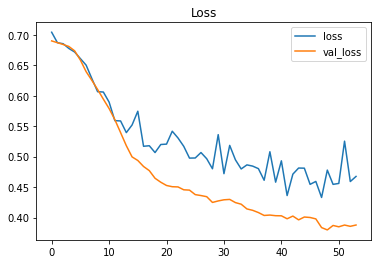

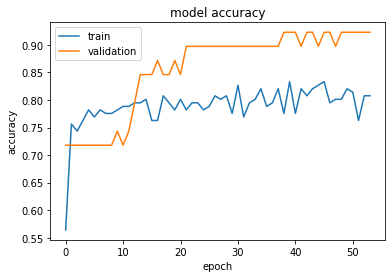


 ================ NN Analysis Completed ================
     acc  precision  recall     f1  roc_auc      layers   opt   dr
0  0.923      0.903     1.0  0.949    0.916  [10, 7, 3]  Adam  0.3


In [37]:
#The NN Class can be found in EDA_ML_Package.NN_functions
results_NN = ΝΝ.create_and_fit_model(X, y, 10, 350, lyrs=[10, 7, 3], verbose=0, dr=0.3)

In [17]:
results_NN = ΝΝ.create_and_fit_model(X, y, 10, 350, lyrs=[12, 6, 3], verbose=0, dr=0.2)

NameError: name 'X' is not defined